In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
credit = pd.read_csv('credit_record.csv')
application = pd.read_csv('application_record.csv')

In [3]:
print('Credit Shape:', credit.shape)
credit.head()

Credit Shape: (1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
print('Application Shape:', application.shape)
application.head()

Application Shape: (438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
print(credit.info())
print('\n','*'*50, '\n')
print(application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None

 ************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     43

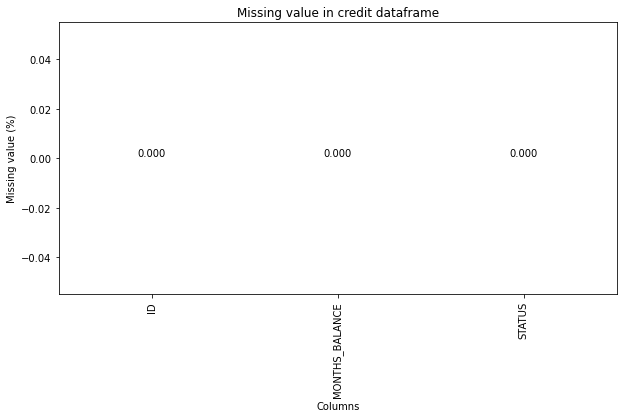

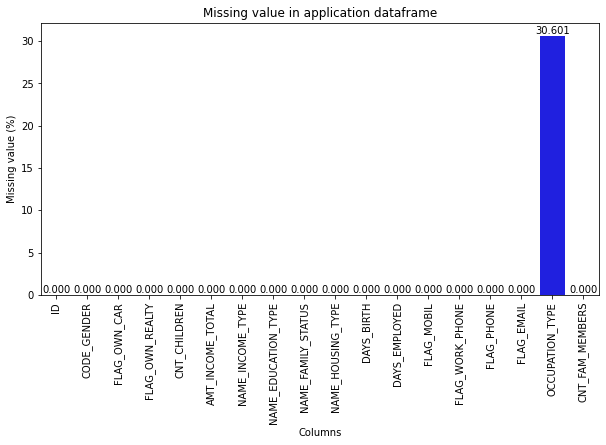

In [6]:
# 绘制柱形图
for df_name, df in zip(['credit', 'application'], [credit, application]):
    # 计算缺失率
    missing_value = []
    columns = []
    for col in df.columns:
        pct_missing = np.mean(df[col].isna()) * 100
        missing_value.append(pct_missing)
        columns.append(col)
            
    # 绘图
    plt.figure(figsize=(10, 5))
    sns.barplot(x=columns, y=missing_value, color='blue')
    plt.title(f"Missing value in {df_name} dataframe")
    plt.xticks(rotation=90)
    plt.xlabel("Columns")
    plt.ylabel("Missing value (%)")
    for i in range(len(columns)):
        plt.text(i, missing_value[i], f"{missing_value[i]:.3f}", ha='center', va='bottom')
    plt.show()

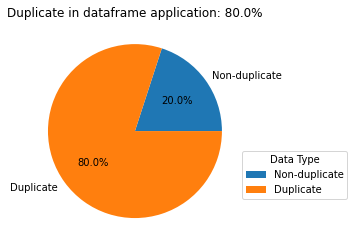

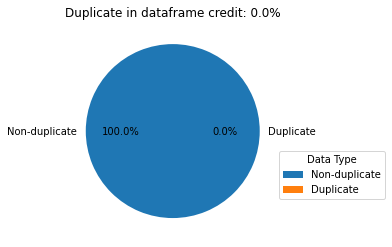

In [7]:
# 计算重复率
duplicate_application = round(application.loc[:, application.columns != 'ID'].duplicated().sum()/len(application), 1)
duplicate_credit = round(credit.duplicated().sum()/len(credit), 1)

# 绘制饼图
labels = ['Non-duplicate', 'Duplicate']
sizes = [100-duplicate_application*100, duplicate_application*100]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f"Duplicate in dataframe application: {duplicate_application*100}%")
plt.legend(title="Data Type", loc="center right", bbox_to_anchor=(1.5, 0.3))
plt.show()

labels = ['Non-duplicate', 'Duplicate']
sizes = [100-duplicate_credit*100, duplicate_credit*100]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f"Duplicate in dataframe credit: {duplicate_credit*100}%")
plt.legend(title="Data Type", loc="center right", bbox_to_anchor=(1.5, 0.3))
plt.show()

In [8]:
# 不同值的个数
print('Credit different values number:')
print(credit.nunique())
print('\n', '*'*30, '\n')
print('Application different values number:')
print(application.nunique())

Credit different values number:
ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

 ****************************** 

Application different values number:
ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64


In [9]:
# FLAG_MOBILE 列只包含一个值，这对数据分析没有用处，移除。
application.drop('FLAG_MOBIL', axis=1, inplace=True)

In [10]:
# 去除 DataFrame application 中除了第一列以外的重复行，并保留第一个出现的重复行。
application = application.drop_duplicates(subset=application.columns[1:], keep='first')

In [11]:
# 填充缺失值绘图
# The "occupation type" column has a missing value of 33%. 
# I replaced it with the category "Other".
application['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)
application['OCCUPATION_TYPE'].head()

0              Other
2     Security staff
3        Sales staff
7              Other
10       Accountants
Name: OCCUPATION_TYPE, dtype: object

In [12]:
# Count backwards from current day (0), -1 means yesterday
application['AGE'] = np.ceil(pd.to_timedelta(application['DAYS_BIRTH'], unit='D').dt.days / -365.25)
application.drop('DAYS_BIRTH', axis=1, inplace=True)

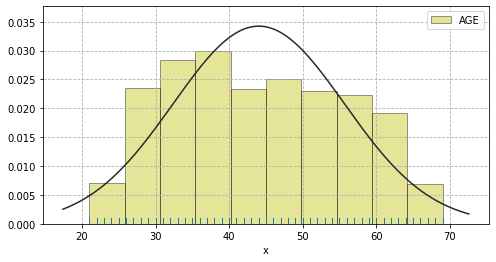

In [13]:
# 直方图
from scipy.stats import norm #使用直方图和最大似然高斯分布拟合绘制分布

rs = np.random.RandomState(50)  # 设置随机数种子
s = application['AGE']

plt.figure(figsize=(8,4))
sns.distplot(s, bins=10, hist=True, kde=False, norm_hist=False,
            rug=True, vertical=False,label='AGE',
            axlabel='x',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)
# 用标准正态分布拟合
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [14]:
application["CODE_GENDER"].replace(['F','M'], [1,0], inplace=True)
application["FLAG_OWN_CAR"].replace(['Y','N'], [1,0], inplace=True)
application["FLAG_OWN_REALTY"].replace(['Y','N'], [1,0], inplace=True)

In [15]:
# Count backwards from current day(0). If positive, it means the person currently unemployed.
# TODO 以后可做，失业多少天
application['UNEMPLOYED'] = 0
application.loc[-application['DAYS_EMPLOYED']<0, 'UNEMPLOYED']=1

print('unemployment column:')
print(application['UNEMPLOYED'].value_counts(normalize=True))

unemployment column:
0    0.825864
1    0.174136
Name: UNEMPLOYED, dtype: float64


In [16]:
application['YEARS_EMPLOYED'] = round((-application['DAYS_EMPLOYED']/365.25), 1)
application.loc[application['YEARS_EMPLOYED']<0, 'YEARS_EMPLOYED']=0

print('years_employed column:')
print(application['YEARS_EMPLOYED'].head())

years_employed column:
0     12.4
2      3.1
3      8.4
7      0.0
10     2.1
Name: YEARS_EMPLOYED, dtype: float64


In [17]:
application.drop('DAYS_EMPLOYED', axis=1, inplace=True)

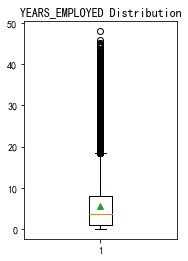

In [18]:
plt.rcParams['font.family'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

plt.subplot(121)
plt.title("YEARS_EMPLOYED Distribution")
plt.boxplot(application['YEARS_EMPLOYED'], showmeans=True)

plt.show()

In [19]:
application['CNT_FAM_MEMBERS'] = application['CNT_FAM_MEMBERS'].astype(int)
application['CNT_FAM_MEMBERS'].head()

0     2
2     2
3     1
7     1
10    2
Name: CNT_FAM_MEMBERS, dtype: int32

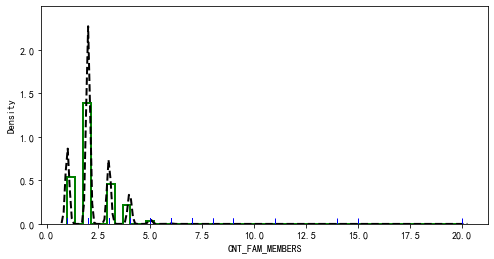

In [20]:
plt.figure(figsize=(8,4))
sns.distplot(application['CNT_FAM_MEMBERS'],rug = True,
            rug_kws = {'color':'b'} ,
            # 设置数据频率分布颜色
            kde_kws={"color": "k", "lw": 2, "label": "KDE",'linestyle':'--'},
            # 设置密度曲线颜色，线宽，标注、线形
            hist_kws={"histtype": "step", "linewidth": 2,"alpha": 1, "color": "g"})  
            # 设置箱子的风格、线宽、透明度、颜色
            # 风格包括：'bar', 'barstacked', 'step', 'stepfilled'
plt.show()

In [21]:
credit['TARGET'] = credit['STATUS']
credit['TARGET'].replace('X', 0, inplace=True)
credit['TARGET'].replace('C', 0, inplace=True)
credit['TARGET'] = credit['TARGET'].astype(int)
credit.loc[credit['TARGET']>=1,'TARGET']=1

target_df = pd.DataFrame(credit.groupby('ID')['TARGET'].agg(max)).reset_index()

In [22]:
target_df['TARGET'].value_counts(normalize=True)

0    0.883658
1    0.116342
Name: TARGET, dtype: float64

<AxesSubplot: title={'center': 'Target Density Plot'}, ylabel='Frequency'>

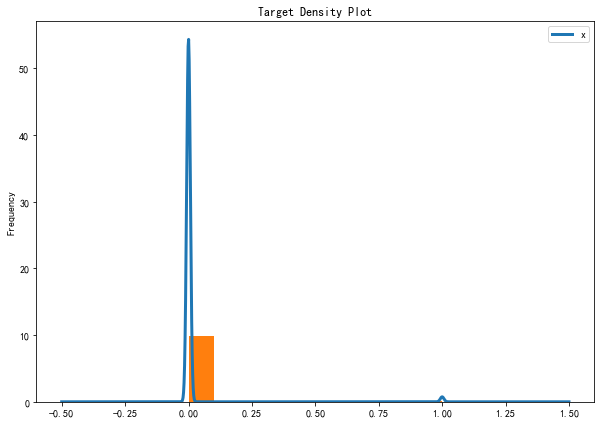

In [23]:
np.random.seed(123)

df = pd.DataFrame({"x": credit['TARGET']})

fig, ax = plt.subplots(figsize=(10, 7))
df.plot(kind="density", ax=ax, linewidth=3, title="Target Density Plot")
df.plot(kind="hist", ax=ax, density=True, legend=False)

In [24]:
df = pd.merge(application, target_df, how='inner', on='ID')

In [25]:
df = df.rename(columns={'ID': 'id','CODE_GENDER': 'gender', 'FLAG_OWN_CAR': 'own_car',
                        'FLAG_OWN_REALTY':'own_property','CNT_CHILDREN':'num_children',
                        'AMT_INCOME_TOTAL':'total_income','NAME_INCOME_TYPE':'income_type',
                        'NAME_EDUCATION_TYPE':'education_type','NAME_FAMILY_STATUS':'family_status',
                        'NAME_HOUSING_TYPE':'housing_type','FLAG_WORK_PHONE':'work_phone',
                        'FLAG_PHONE':'phone','FLAG_EMAIL':'email','OCCUPATION_TYPE':'occupation_type',
                        'CNT_FAM_MEMBERS':'num_family','TARGET':'target', 'AGE':'age','UNEMPLOYED':'unemployed',
                        'YEARS_EMPLOYED':'years_employed'})

df = df[['id', 'gender', 'own_car', 'own_property', 'work_phone',
        'phone', 'email', 'unemployed', 'num_children', 'num_family',
        'total_income', 'age', 'years_employed',
        'income_type', 'education_type', 'family_status',
        'housing_type', 'occupation_type','target']]

In [26]:
df = df.set_index('id')

In [27]:
print(df.shape)
df.head()

(9709, 18)


,gender,own_car,own_property,work_phone,phone,email,unemployed,num_children,num_family,total_income,age,years_employed,income_type,education_type,family_status,housing_type,occupation_type,target
id,,,,,,,,,,,,,,,,,,
5008804,0,1,1,1,0,0,0,0,2,427500.0,33.0,12.4,Working,Higher education,Civil marriage,Rented apartment,Other,1
5008806,0,1,1,0,0,0,0,0,2,112500.0,59.0,3.1,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
5008808,1,0,1,0,1,1,0,0,1,270000.0,53.0,8.4,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
5008812,1,0,1,0,0,0,1,0,1,283500.0,62.0,0.0,Pensioner,Higher education,Separated,House / apartment,Other,0
5008815,0,1,1,1,1,1,0,0,2,270000.0,47.0,2.1,Working,Higher education,Married,House / apartment,Accountants,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 5008804 to 5150337
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           9709 non-null   int64  
 1   own_car          9709 non-null   int64  
 2   own_property     9709 non-null   int64  
 3   work_phone       9709 non-null   int64  
 4   phone            9709 non-null   int64  
 5   email            9709 non-null   int64  
 6   unemployed       9709 non-null   int64  
 7   num_children     9709 non-null   int64  
 8   num_family       9709 non-null   int32  
 9   total_income     9709 non-null   float64
 10  age              9709 non-null   float64
 11  years_employed   9709 non-null   float64
 12  income_type      9709 non-null   object 
 13  education_type   9709 non-null   object 
 14  family_status    9709 non-null   object 
 15  housing_type     9709 non-null   object 
 16  occupation_type  9709 non-null   object 
 17  targe

In [29]:
# Column Target
df_target = df[['target']]
df_target['target'] = np.where(df_target['target']==1, 'bad', 'good')

print(df_target['target'].value_counts())
print('-'*30)
print('Proportion of Target(%)')
print(df_target['target'].value_counts()/len(df_target)*100)
print('-'*30)

count_good = len(df_target.loc[df_target['target']=='good'])
count_bad = len(df_target.loc[df_target['target']=='bad'])
print("Imbalance Ratio = 1:{}".format(int(count_good/count_bad)))

good    8426
bad     1283
Name: target, dtype: int64
------------------------------
Proportion of Target(%)
good    86.785457
bad     13.214543
Name: target, dtype: float64
------------------------------
Imbalance Ratio = 1:6


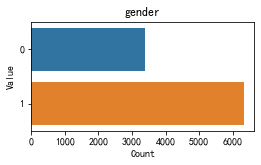

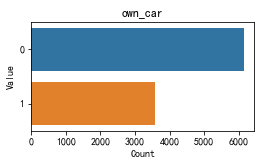

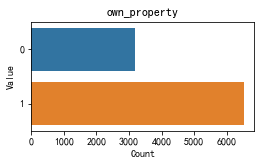

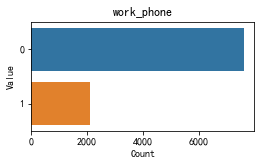

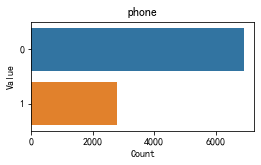

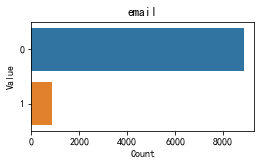

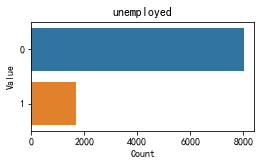

In [30]:
binary_cols = []

for col in df.select_dtypes(include=['int64']):
    if len(df[col].unique()) == 2 and 0 in df[col].unique() and 1 in df[col].unique():
        binary_cols.append(col)

for col in binary_cols:
    plt.subplots(figsize=(4,2))
    sns.countplot(y=col, data=df)
    plt.title(col, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel('Value')
    plt.show()

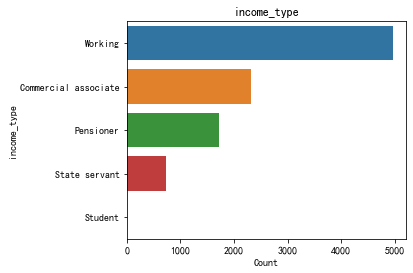

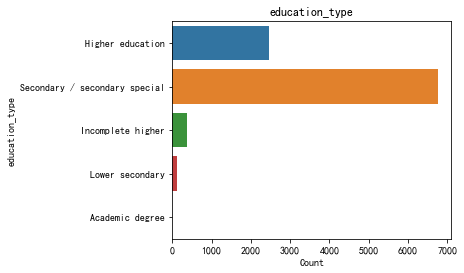

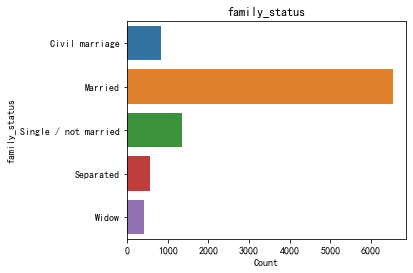

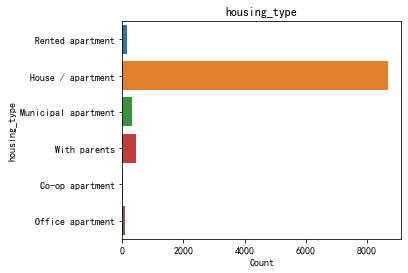

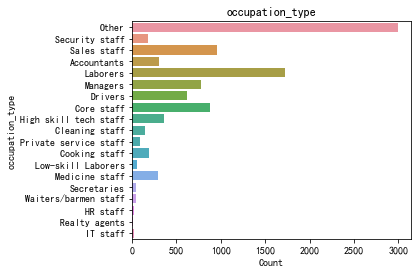

In [31]:
object_cols = df.select_dtypes(include='object')

for col in object_cols:
    plt.subplots(figsize=(5,4))
    sns.countplot(y=col, data=df)
    plt.title(col, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

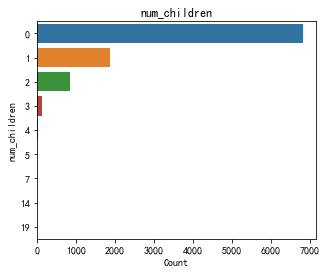

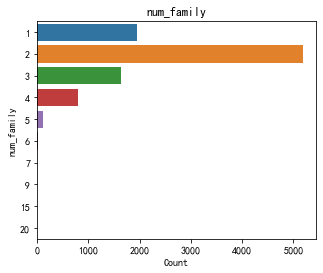

In [32]:
int_cols = ['num_children', 'num_family']

for col in int_cols:
    plt.subplots(figsize=(5,4))
    sns.countplot(y=col, data=df)
    plt.title(col, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

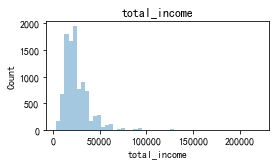

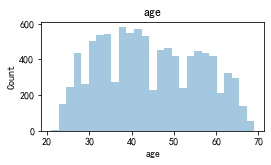

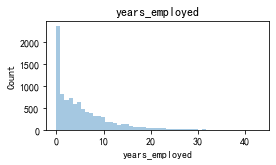

In [33]:
# Convert total_income from CNY to USD
df['total_income'] = df['total_income']*0.14

num_cols = df.select_dtypes(include='float64').columns.tolist()

for col in num_cols:
    plt.subplots(figsize=(4,2))
    sns.distplot(df[col], kde=False)
    plt.grid(False)
    plt.title(col, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [34]:
df_age = df[['target', 'age']]
df_age['bin_person_age'] = pd.qcut(df_age['age'], q=5, duplicates='drop', precision=0)
df_age = df_age.groupby('bin_person_age').agg({'target': ['count', 'sum']})
df_age.columns = df_age.columns.map('_'.join)
df_age['distribution'] = df_age['target_count']/df_age['target_count'].sum()
df_age['bad_rate'] = df_age['target_sum']/df_age['target_count']
df_age = df_age.reset_index()
df_age

,bin_person_age,target_count,target_sum,distribution,bad_rate
0,"(20.0, 33.0]",2133,338,0.219693,0.158462
1,"(33.0, 40.0]",1941,258,0.199918,0.132921
2,"(40.0, 47.0]",1778,224,0.183129,0.125984
3,"(47.0, 56.0]",1983,258,0.204243,0.130106
4,"(56.0, 69.0]",1874,205,0.193017,0.109392


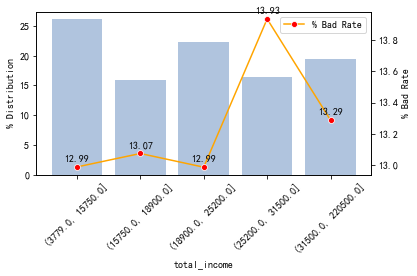

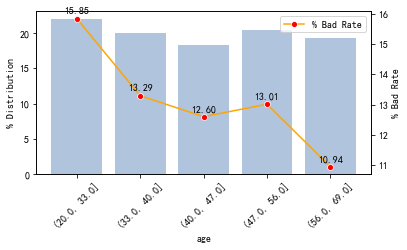

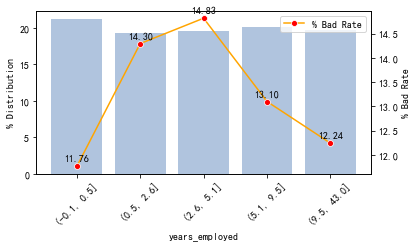

In [35]:
df_plot = df.copy()

for i in num_cols:
    df_group = df_plot[['target', i]]
    df_group['bin_'+i] = pd.qcut(df_group[i], q=5, duplicates='drop', precision=0)
    df_group = df_group.groupby('bin_'+i).agg({'target': ['count', 'sum']})
    df_group.columns = df_group.columns.map('_'.join)
    df_group['dist'] = df_group['target_count']/df_group['target_count'].sum()
    df_group['bad_rate'] = df_group['target_sum']/df_group['target_count']
    df_group = df_group.reset_index()
 
    x1 = df_group['bin_'+i].astype(str)
    x2 = df_group.index
    y1 = df_group['dist']*100
    y2 = df_group['bad_rate']*100

    fig, ax1  = plt.subplots(figsize=(6,3))
    plt.tick_params(axis='x', rotation = 45)

    # Left y axis
    ax1.bar(x1,y1, data=df_group, color='lightsteelblue')

    # Right y axis
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x=x2, y=y2, data=df_group, marker='o',
                       markerfacecolor='red', color='orange', label='% Bad Rate')
    ax1.set_xlabel(i)
    ax1.set_ylabel('% Distribution')
    ax2.set_ylabel('% Bad Rate')
    ax1.grid(False)
    ax2.grid(False)

    # Plot bad rate value
    for x,y in zip(x2,y2):
            label = "{:.2f}".format(y)
            plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center') 

    plt.show()

In [36]:
def mean_target_percat(df):
    for i in df:
        if i == 'target':
            pass
        else:
            temp_df = df_plot[i].value_counts(normalize=True).reset_index()
            temp_df.columns = [i, 'dist']

            temp_df = temp_df.merge(df_plot.groupby(i)['target'].mean().reset_index(),
                                    on=i, how='left').sort_values(by='target').reset_index(drop=True)

            fig, ax = plt.subplots(figsize=(6, 3))
            plt.xticks(temp_df.index, temp_df[i], rotation=45)
            
            # Left y axis
            ax.bar(temp_df.index, temp_df['dist']*100, color='lightsteelblue')
            
            # Right y axis
            ax2 = ax.twinx()
            ax2.plot(temp_df.index, temp_df["target"]*100, color='orange', label='% Bad Rate',
                     marker='o', markerfacecolor='red')
            ax.set_ylabel('% Distribution')
            ax.set_xlabel(i)
            ax2.set_ylabel('% Bad Rate')
            ax2.legend()
            ax.grid(False)
            ax2.grid(False)
            
            # Plot bad rate value
            for x,y in zip(temp_df.index, temp_df["target"]*100):
                  label = "{:.2f}".format(y)
                  plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center') 
            plt.show()

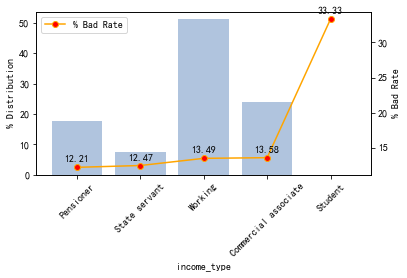

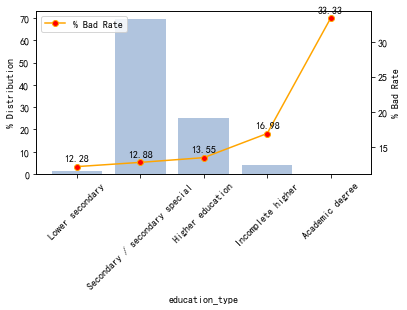

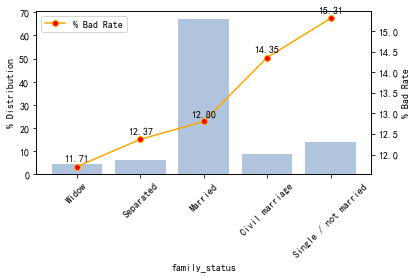

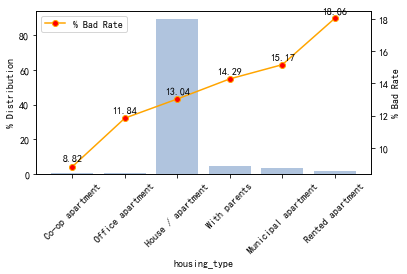

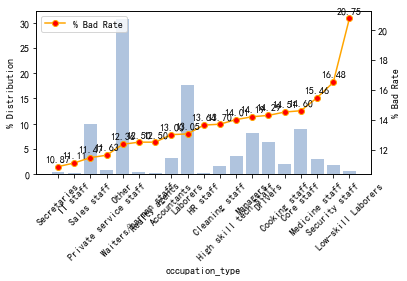

In [38]:
mean_target_percat(object_cols)

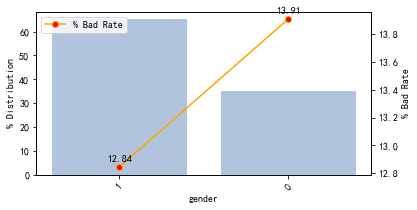

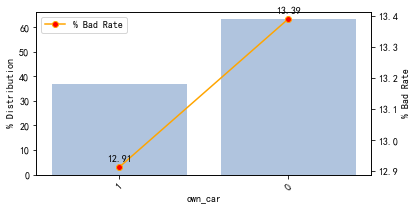

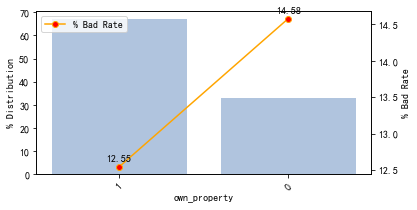

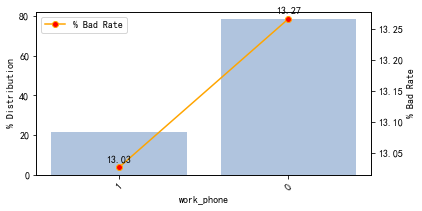

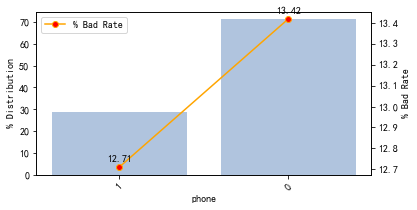

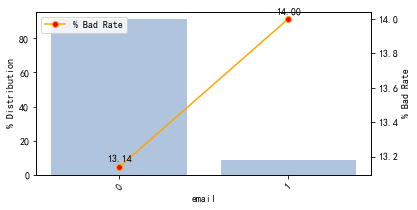

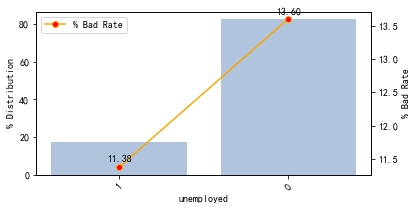

In [39]:
mean_target_percat(binary_cols)

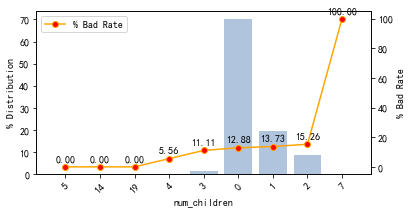

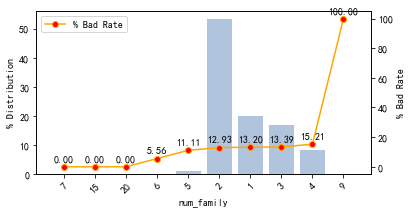

In [40]:
mean_target_percat(int_cols)

In [41]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
df['num_children'] = lbl.fit_transform(df['num_children'].astype(int))
df['num_family'] = lbl.fit_transform(df['num_family'].astype(int))
df['total_income'] = lbl.fit_transform(df['total_income'].astype(float))
df['age'] = lbl.fit_transform(df['age'].astype(float))
df['years_employed'] = lbl.fit_transform(df['years_employed'].astype(float))
df['income_type'] = lbl.fit_transform(df['income_type'].astype(str)).astype('int64')#将提示的包含错误数据类型这一列进行转换
df['education_type'] = lbl.fit_transform(df['education_type'].astype(str)).astype('int64')
df['family_status'] = lbl.fit_transform(df['family_status'].astype(str)).astype('int64')
df['housing_type'] = lbl.fit_transform(df['housing_type'].astype(str)).astype('int64')
df['occupation_type'] = lbl.fit_transform(df['occupation_type'].astype(str)).astype('int64')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# 加载样本数据集
X=df.drop(['target'], axis=1)
y=df['target']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023) # 数据集分割

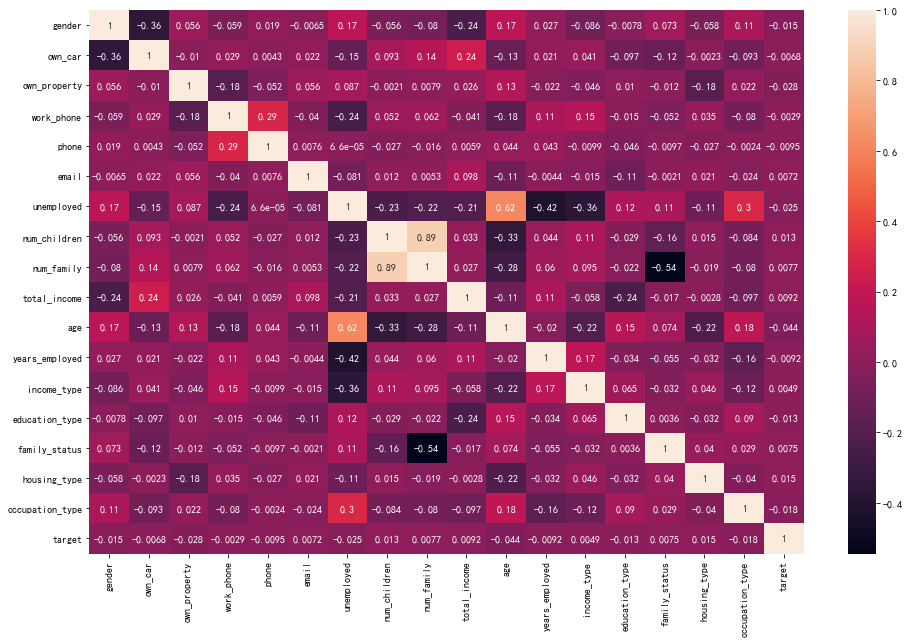

In [44]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

In [49]:
features = [x for x in df.columns]

In [50]:
forest=RandomForestClassifier(n_estimators=100,random_state=2023) #　随机森林
forest.fit(X_train,y_train)
forest_y_score=forest.predict_proba(X_test)
# print(forest_y_score[:,1])
forest_score=forest.score(X_test,y_test) #准确率
print('forest_score:',forest_score)

Gbdt=GradientBoostingClassifier(random_state=2023) #GBDT
Gbdt.fit(X_train,y_train)
Gbdt_score=Gbdt.score(X_train,y_train) #准确率
print('Gbdt_score:',Gbdt_score)

Xgbc=XGBClassifier(random_state=2023)  #Xgbc
Xgbc.fit(X_train,y_train)
y_xgbc_pred=Xgbc.predict(X_test)
Xgbc_score=accuracy_score(y_test,y_xgbc_pred) #准确率
print('Xgbc_score:',Xgbc_score)

forest_score: 0.8657741160315826
Gbdt_score: 0.8697763390229547
[23:35:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgbc_score: 0.858908341915551


In [51]:
y_test_hot = label_binarize(y_test, classes =(0, 1)) # 将测试集标签数据用二值化编码的方式转换为矩阵
Gbdt_y_score = Gbdt.decision_function(X_test) # 得到Gbdt预测的损失值
forest_fpr,forest_tpr,forest_threasholds=metrics.roc_curve(y_test.ravel(),forest_y_score[:,1].ravel()) # 计算ROC的值,forest_threasholds为阈值
Gbdt_fpr,Gbdt_tpr,Gbdt_threasholds=metrics.roc_curve(y_test_hot.ravel(),Gbdt_y_score.ravel()) # 计算ROC的值,Gbdt_threasholds为阈值

forest_auc=metrics.auc(forest_fpr,forest_tpr) #Gbdt_auc值
print('forest_auc',forest_auc)

Gbdt_auc=metrics.auc(Gbdt_fpr,Gbdt_tpr) #Gbdt_auc值
print('Gbdt_auc:',Gbdt_auc)

Xgbc_auc=roc_auc_score(y_test,y_xgbc_pred) #Xgbc_auc值
print('Xgbc_auc:',Xgbc_auc)

forest_auc 0.5323134223151016
Gbdt_auc: 0.5396240458094398
Xgbc_auc: 0.49853528380042544


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [53]:
# 获取特征值和目标值

# 获取特征名称
feature_name = df.columns

params = {'n_estimators': 500, # 弱分类器的个数
          'max_depth': 3,       # 弱分类器（CART回归树）的最大深度
          'min_samples_split': 5, # 分裂内部节点所需的最小样本数
          'learning_rate': 0.05,  # 学习率
          'loss': 'ls'}           # 损失函数：均方误差损失函数

In [54]:
GBDTreg = GradientBoostingRegressor(**params)
GBDTreg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, min_samples_split=5,
                          n_estimators=500)

gender             0.014597
own_car            0.007211
own_property       0.013368
work_phone         0.011495
phone              0.006926
email              0.019187
unemployed         0.002202
num_children       0.056088
num_family         0.041093
total_income       0.248614
age                0.149236
years_employed     0.218701
income_type        0.038451
education_type     0.021106
family_status      0.046012
housing_type       0.015207
occupation_type    0.090505
dtype: float64
unemployed         0.002202
phone              0.006926
own_car            0.007211
work_phone         0.011495
own_property       0.013368
gender             0.014597
housing_type       0.015207
email              0.019187
education_type     0.021106
income_type        0.038451
num_family         0.041093
family_status      0.046012
num_children       0.056088
occupation_type    0.090505
age                0.149236
years_employed     0.218701
total_income       0.248614
dtype: float64
['unemployed', 'ph

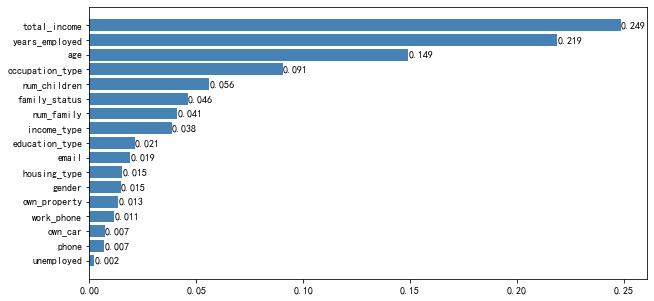

In [55]:
importance = GBDTreg.feature_importances_
Impt_Series = pd.Series(importance, index = X_train.columns)
print(Impt_Series)



# Impt_Series.sort_values(ascending = True).plot('barh')
Impt_Series = Impt_Series.sort_values(ascending = True)

print(Impt_Series)
print(list(Impt_Series.index))
Y = list(Impt_Series.index)
# 绘制条形图
plt.figure(figsize=(10,5)) 
plt.barh(range(len(Y)), # 指定条形图y轴的刻度值
        Impt_Series.values, # 指定条形图x轴的数值
        tick_label = Y, # 指定条形图y轴的刻度标签
        color = 'steelblue', # 指定条形图的填充色
       )

print(Impt_Series.values)
# print()
for y,x in enumerate(Impt_Series.values):
    plt.text(x+0.0001,y,'%s' %round(x,3),va='center')
plt.show()
